## MODELOS NO SUPERVISADOS

KMeans para realizar el clustering.

Pasos para realizar KMeans clustering:
Escalado de características: Como KMeans se ve afectado por la escala de las características, primero normalizaremos los datos.

Aplicar KMeans: Vamos a entrenar el modelo y predecir el cluster al que pertenece cada muestra.

Evaluación: Evaluaremos el rendimiento de los clusters utilizando métricas como la silhouette score.

kMeans clustering

Silhouette Score: 0.23574437863354514


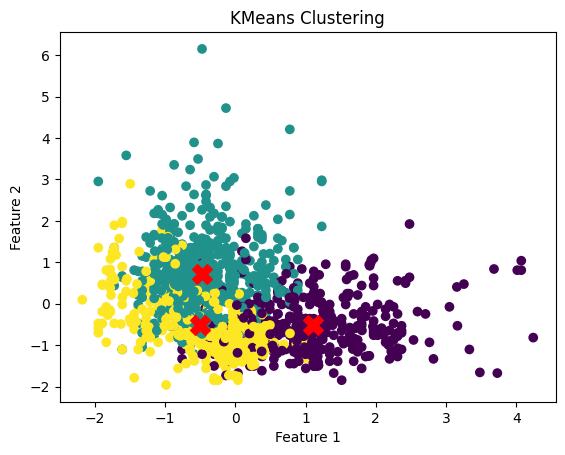

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

# # Leeer el vinotinto.csv

vinotinto_df = pd.read_csv('../data/processed/vinotinto.csv')


# Convertir quality_label a valores numéricos
label_encoder = LabelEncoder()
vinotinto_df['quality_label_encoded'] = label_encoder.fit_transform(vinotinto_df['quality_label'])

# Definir las características (X) y la variable objetivo (y)
X = vinotinto_df.drop(['quality', 'quality_label', 'quality_label_encoded'], axis=1)  # Eliminar 'quality' y 'quality_label'
y = vinotinto_df['quality_label_encoded']

# Balanceo de clases: calculamos los pesos de las clases
class_weights = compute_class_weight('balanced', classes=np.array([0, 1, 2]), y=y)
class_weight_dict = dict(enumerate(class_weights))

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Paso 1: Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)  # Usamos X_res para los datos balanceados por SMOTE

# Paso 2: Aplicar KMeans con un número de clusters a probar
kmeans = KMeans(n_clusters=3, random_state=42)  # Número de clusters (en este caso 3)
kmeans.fit(X_scaled)

# Paso 3: Obtener las predicciones de los clusters
y_kmeans = kmeans.predict(X_scaled)

# Paso 4: Evaluar la calidad del clustering usando el Silhouette Score
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

# Paso 5: Visualizar los resultados (Si las características lo permiten)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


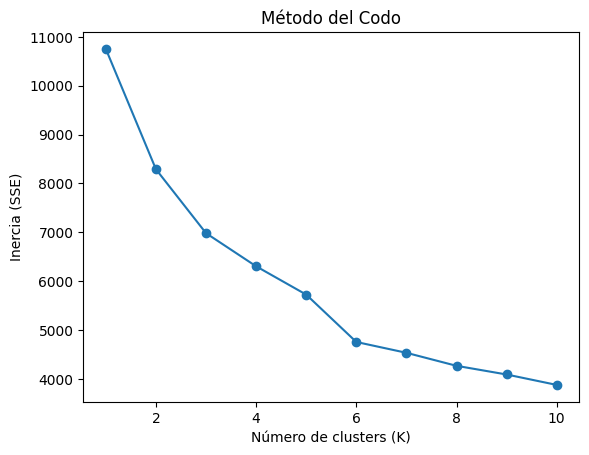

In [28]:
# Método del Codo para encontrar el número óptimo de clusters
inertia = []  # Inertia es la suma de los errores cuadráticos (SSE)
for k in range(1, 11):  # Probar con K entre 1 y 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar la inercia
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia (SSE)")
plt.show()


Inercia: Es la suma de los errores cuadráticos entre los puntos y el centroide de su cluster.

Al graficar la inercia frente al número de clusters, puedes observar un punto de inflexión (el "codo") que indica el número óptimo de clusters.

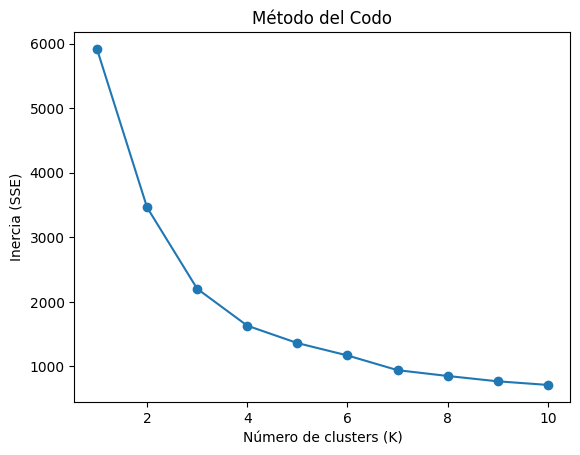

In [29]:
inertia = []  # Suma de las distancias cuadradas (inercia)
for k in range(1, 11):  # Probar con K entre 1 y 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)  # Ajustamos KMeans a las dos primeras componentes principales
    inertia.append(kmeans.inertia_)

# Graficar la inercia
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia (SSE)")
plt.show()


numero de kluster ideal es 3

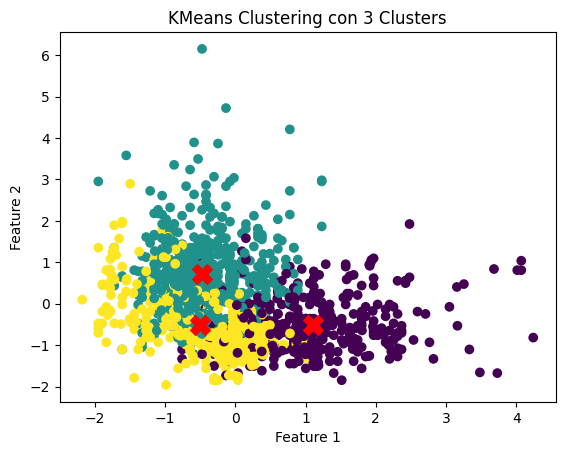

Silhouette Score: 0.23574437863354514


In [30]:
# Entrenar KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)  # Usamos X_scaled para los datos balanceados por SMOTE

# Obtener las predicciones de los clusters
y_kmeans = kmeans.predict(X_scaled)

# Visualizar los resultados de KMeans
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis')  # Colorear según el cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')  # Centro de los clusters
plt.title("KMeans Clustering con 3 Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Evaluar la calidad del clustering usando el Silhouette Score
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")


## UTILIZAREMOS Kmeans con PCA

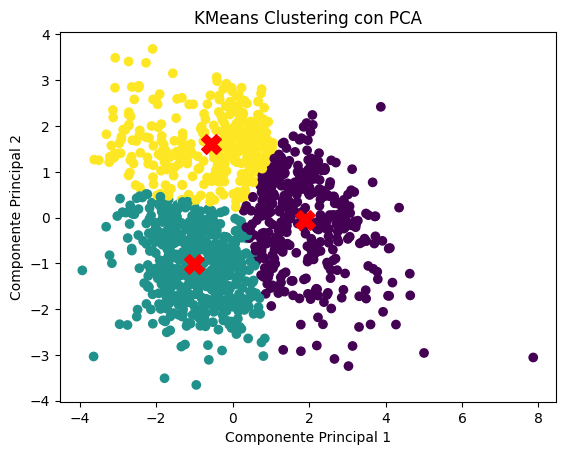

Silhouette Score: 0.4183301946974814


In [31]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Paso 1: Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)  # Usamos X_res para los datos balanceados por SMOTE

# Paso 2: Aplicar PCA para reducir las dimensiones a 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Paso 3: Aplicar KMeans con 3 clusters (puedes experimentar con K)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)  # Ajustamos el modelo KMeans sobre las dos primeras componentes principales

# Paso 4: Obtener las predicciones de los clusters
y_kmeans = kmeans.predict(X_pca)

# Paso 5: Visualizar los resultados de KMeans en el espacio 2D
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')  # Colorear según el cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')  # Centro de los clusters
plt.title("KMeans Clustering con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

# Paso 6: Evaluar la calidad del clustering usando el Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_pca, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")


_____________________________________________

## Aplicar otro modelo de clustering: DBSCAN

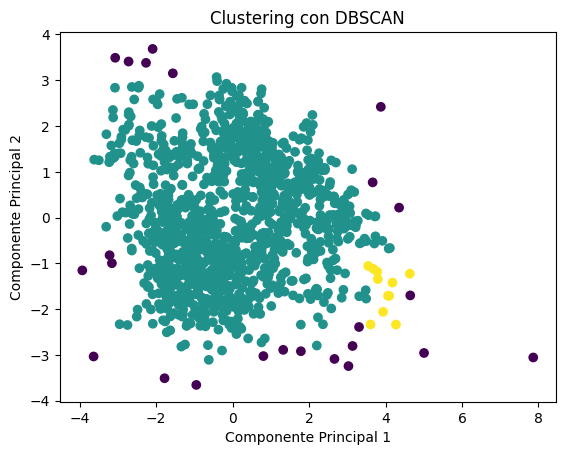

Silhouette Score de DBSCAN: 0.3296210198302971


In [ ]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajusta eps y min_samples según tus datos
y_dbscan = dbscan.fit_predict(X_pca)

# Visualizar los resultados de DBSCAN
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_dbscan, cmap='viridis')
plt.title("Clustering con DBSCAN")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

# Evaluar la calidad del clustering de DBSCAN usando el Silhouette Score
silhouette_avg_dbscan = silhouette_score(X_pca, y_dbscan)
print(f"Silhouette Score de DBSCAN: {silhouette_avg_dbscan}")


_____________________________________________